## EMAIL SPAM DETECTION WITH MACHINE LEARNING

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [3]:
df=pd.read_csv('spam.csv',encoding='latin-1')
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
df.size

27860

## Data Cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [9]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
df.sample(4)

,v1,v2
1922,ham,I'll be in sch fr 4-6... I dun haf da book in ...
493,ham,What class of &lt;#&gt; reunion?
2675,ham,I'm sick !! I'm needy !! I want you !! *pouts*...
3393,ham,Bull. Your plan was to go floating off to IKEA...


In [10]:
# renaming the columns
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)
df.sample(4)

,Target,Text
3247,ham,Also track down any lighters you can find
3914,ham,Ard 530 lor. I ok then message Ì_ lor.
93,spam,Please call our customer service representativ...
2354,ham,R we going with the &lt;#&gt; bus?


## Encoding

In [12]:
lab_en=LabelEncoder()

In [13]:
df['Target']=lab_en.fit_transform(df['Target'])
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
# checking missing values
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [15]:
df.duplicated().sum()

403

In [16]:
# Removing duplicates
df=df.drop_duplicates(keep='first')

In [17]:
df.duplicated().sum()

0

In [18]:
df.shape

(5169, 2)

## EDA

In [20]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [21]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

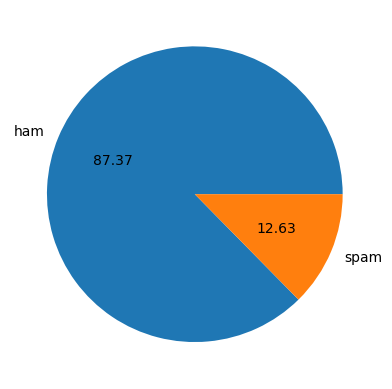

In [22]:
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [23]:
!pip install nltk

In [24]:
import nltk

In [25]:
nltk.download('punkt')

[nltk_data] Error loading punkt: <urlopen error [Errno 11001]
[nltk_data]     getaddrinfo failed>


False

In [26]:
# finding no.of charcters in sms/email
df['Text'].apply(len)

0       111
1        29
2       155
3        49
4        61
       ... 
5567    161
5568     37
5569     57
5570    125
5571     26
Name: Text, Length: 5169, dtype: int64

In [27]:
# adding numbers of characters to the dataset
df['num_characters']=df['Text'].apply(len)
df.head()

,Target,Text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [28]:
# Fetcing for numbers of words
df['Text'].apply(lambda x:nltk.word_tokenize(x))

0       [Go, until, jurong, point, ,, crazy, .., Avail...
1                [Ok, lar, ..., Joking, wif, u, oni, ...]
2       [Free, entry, in, 2, a, wkly, comp, to, win, F...
3       [U, dun, say, so, early, hor, ..., U, c, alrea...
4       [Nah, I, do, n't, think, he, goes, to, usf, ,,...
                              ...                        
5567    [This, is, the, 2nd, time, we, have, tried, 2,...
5568     [Will, Ì_, b, going, to, esplanade, fr, home, ?]
5569    [Pity, ,, *, was, in, mood, for, that, ., So, ...
5570    [The, guy, did, some, bitching, but, I, acted,...
5571                  [Rofl, ., Its, true, to, its, name]
Name: Text, Length: 5169, dtype: object

In [29]:
df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))

0       24
1        8
2       37
3       13
4       15
        ..
5567    35
5568     9
5569    15
5570    27
5571     7
Name: Text, Length: 5169, dtype: int64

In [30]:
df['num_words']= df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,Target,Text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [31]:
# finding no.of sentences 
df['Text'].apply(lambda x:nltk.sent_tokenize(x))

0       [Go until jurong point, crazy.., Available onl...
1                        [Ok lar..., Joking wif u oni...]
2       [Free entry in 2 a wkly comp to win FA Cup fin...
3       [U dun say so early hor... U c already then sa...
4       [Nah I don't think he goes to usf, he lives ar...
                              ...                        
5567    [This is the 2nd time we have tried 2 contact ...
5568              [Will Ì_ b going to esplanade fr home?]
5569    [Pity, * was in mood for that., So...any other...
5570    [The guy did some bitching but I acted like i'...
5571                        [Rofl., Its true to its name]
Name: Text, Length: 5169, dtype: object

In [32]:
df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

0       2
1       2
2       2
3       1
4       1
       ..
5567    4
5568    1
5569    2
5570    1
5571    2
Name: Text, Length: 5169, dtype: int64

In [33]:
df['num_sentences']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Target,Text,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [34]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
# ham
df[df['Target'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


<Axes: xlabel='num_characters', ylabel='Count'>

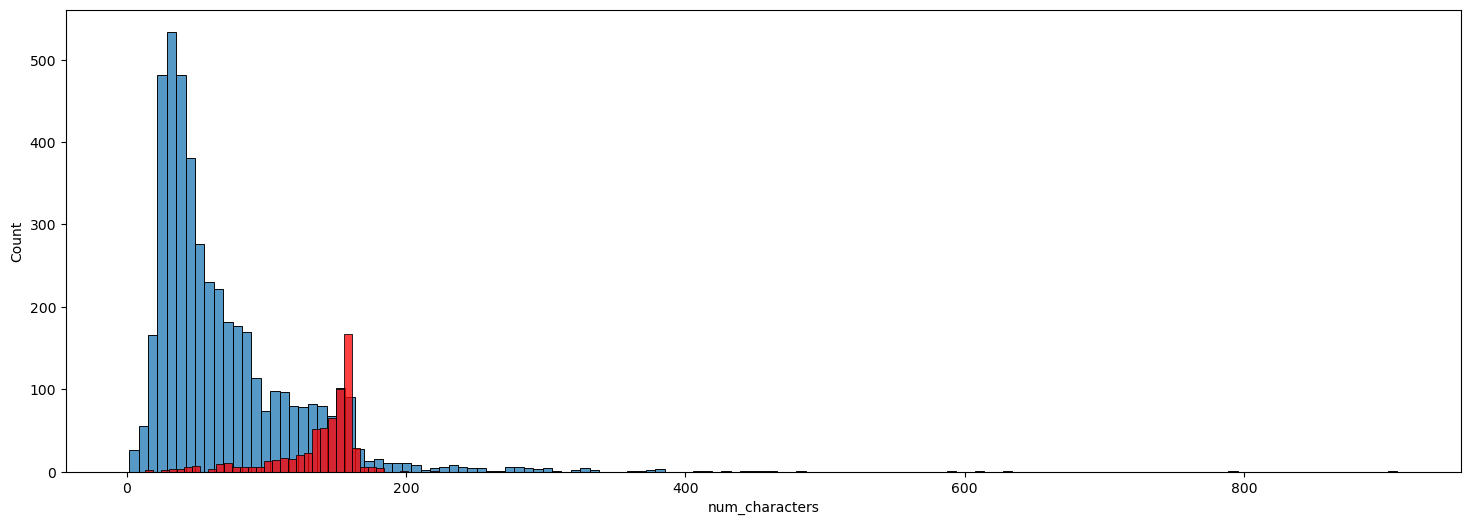

In [36]:
plt.figure(figsize=(18,6))
sns.histplot(df[df['Target']==0]['num_characters']) #ham
sns.histplot(df[df['Target']==1]['num_characters'],color='red') #spam


<Axes: xlabel='num_words', ylabel='Count'>

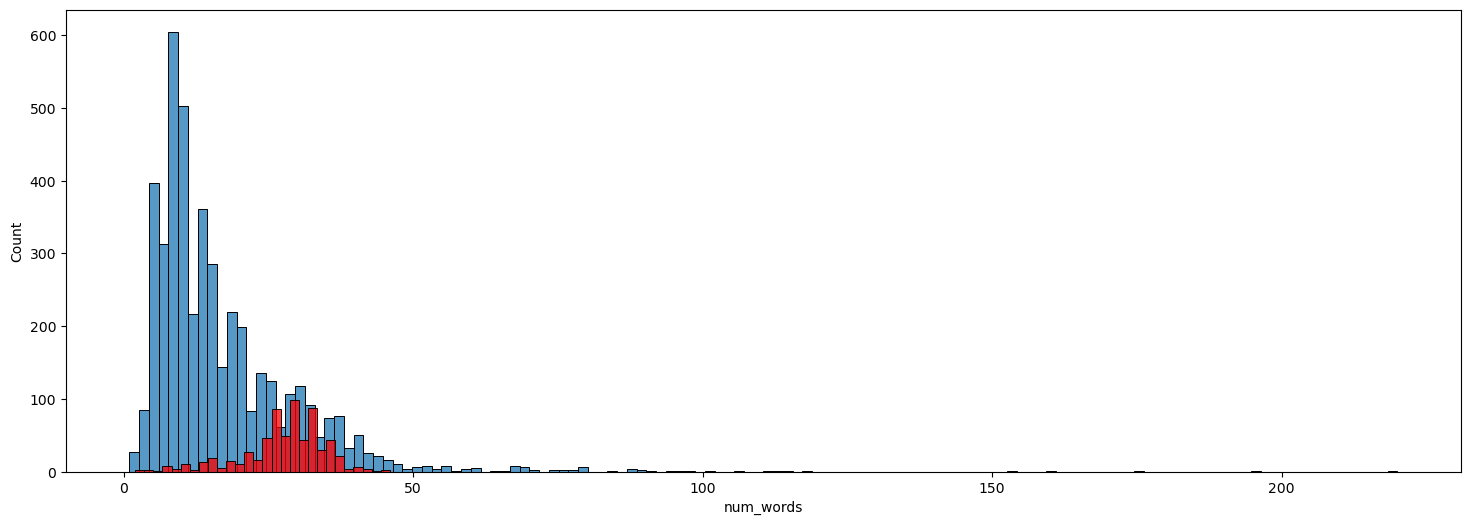

In [37]:
plt.figure(figsize=(18,6))
sns.histplot(df[df['Target']==0]['num_words']) #ham
sns.histplot(df[df['Target']==1]['num_words'],color='red') #spam


<Axes: xlabel='num_sentences', ylabel='Count'>

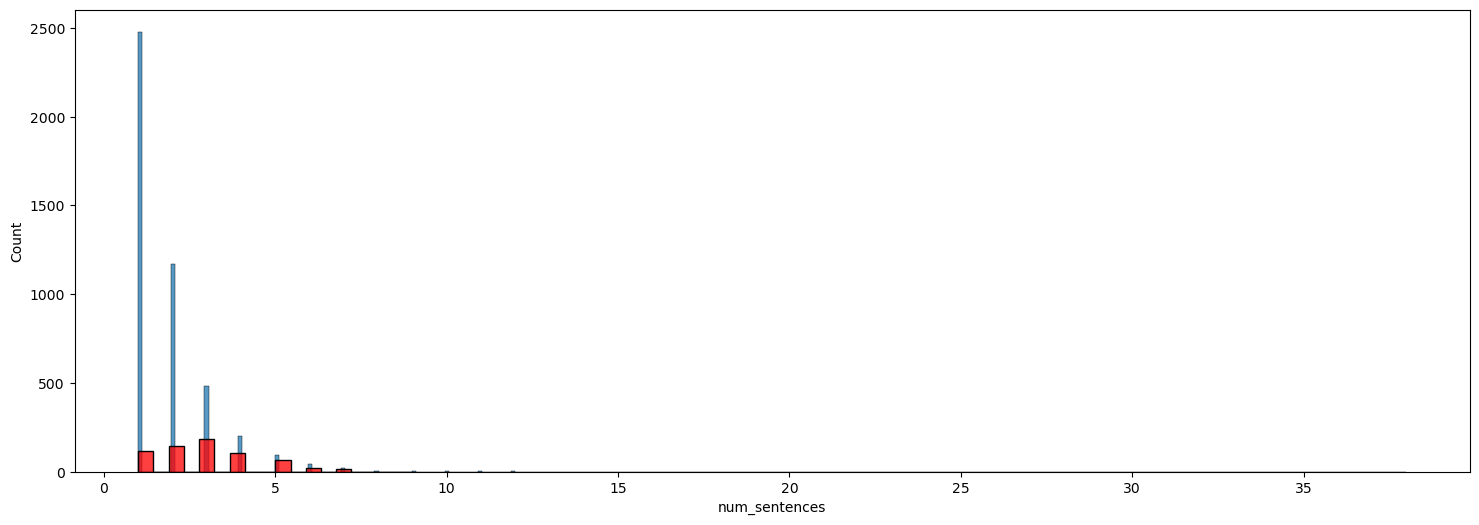

In [38]:
plt.figure(figsize=(18,6))
sns.histplot(df[df['Target']==0]['num_sentences']) #ham
sns.histplot(df[df['Target']==1]['num_sentences'],color='red') #spam


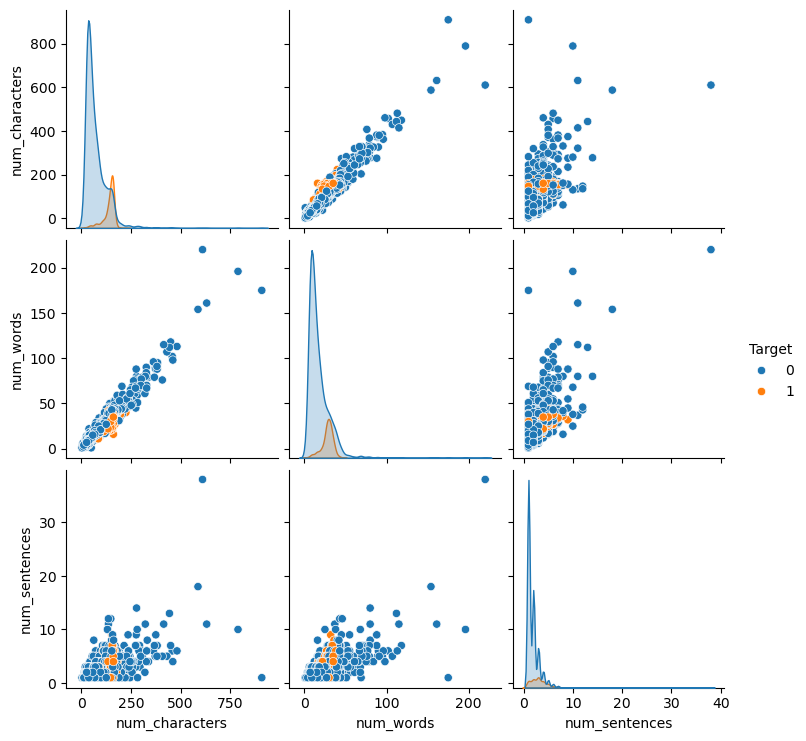

In [39]:
sns.pairplot(df,hue='Target')

## Data Preprocessing

In [41]:
# lower
def transform_text1(text1):
    text1=text1.lower()
    return text1

In [42]:
transform_text1('HI Hello How aRe YoU')

'hi hello how are you'

In [43]:
# Tokenization
def transform_text2(text2):
    text2=nltk.word_tokenize(text2)
    return text2

In [44]:
transform_text2('HI Hello How aRe YoU')

['HI', 'Hello', 'How', 'aRe', 'YoU']

In [45]:
# Removing special characters
def transform_text3(text3):
    y=[]
    for i in text3:
        if i.isalnum():
            y.append(i)
    return y

In [46]:
print(transform_text3('HI Hello @How % #29 aRe YoU ?'),end='')

['H', 'I', 'H', 'e', 'l', 'l', 'o', 'H', 'o', 'w', '2', '9', 'a', 'R', 'e', 'Y', 'o', 'U']

In [47]:
def transform_text4(text4):
    text4=text4.lower()
    text4=nltk.word_tokenize(text4)
    a=[]
    for i in text4:
        if i.isalnum():
            a.append(i)
    return a

In [48]:
print(transform_text4('HI Hello @How % #29 aRe YoU ?'),end='')

['hi', 'hello', 'how', '29', 'are', 'you']

In [49]:
# Removing stop words and punctuation
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [50]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [51]:
def transform_text5(text5):
    text5=text5.lower()
    text5=nltk.word_tokenize(text5)
    b=[]
    for i in text5:
        if i.isalnum():
            b.append(i)
    text5=b[:]
    b.clear()
    for i in text5:
        if i not in stopwords.words('english') and i not in string.punctuation:
            b.append(i)
    return b
    

In [52]:
print(transform_text5('HI Hello @How % #29 aRe YoU ?'),end='')


['hi', 'hello', '29']

In [53]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('Singing')

'sing'

In [54]:
def transform_text6(text6):
    text6=text6.lower()
    text6=nltk.word_tokenize(text6)
    c=[]
    for i in text6:
        if i.isalnum():
            c.append(i)
    text6=c[:]
    c.clear()
    for i in text6:
        if i not in stopwords.words('english') and i not in string.punctuation:
            c.append(i)
    text6=c[:]
    c.clear()
    for i in text6:
        c.append(ps.stem(i))
    return " ".join(c)
    

In [55]:
transform_text6('Iam doing a internship in oasis what about you?')

'iam internship oasi'

In [56]:
df['Text'][200]

'I sent you  &lt;#&gt;  bucks'

In [57]:
transform_text6('I sent you  &lt;#&gt;  bucks')


'sent lt gt buck'

In [58]:
df['Text'][2000]

"But i'll b going 2 sch on mon. My sis need 2 take smth."

In [59]:
transform_text6('But i ll b going 2 sch on mon. My sis need 2 take smth.')

'b go 2 sch mon si need 2 take smth'

In [60]:
def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [61]:
# applying transform text on Text column
df['Text'].apply(transform_text)

0       go jurong point crazi avail bugi n great world...
1                                   ok lar joke wif u oni
2       free entri 2 wkli comp win fa cup final tkt 21...
3                     u dun say earli hor u c alreadi say
4                    nah think goe usf live around though
                              ...                        
5567    2nd time tri 2 contact u pound prize 2 claim e...
5568                                b go esplanad fr home
5569                                    piti mood suggest
5570    guy bitch act like interest buy someth els nex...
5571                                       rofl true name
Name: Text, Length: 5169, dtype: object

In [ ]:
df['Transform_Text']=df['Text'].apply(transform_text)

In [ ]:
df.head()

In [ ]:
# Top 30 words inspam(Target=1)
df[df['Target']==1]['Transform_Text']

In [ ]:
df[df['Target']==1]['Transform_Text'].tolist()

In [ ]:
for msg in df[df['Target']==1]['Transform_Text'].tolist():
    print(msg.split())

In [ ]:
spam_corpus=[]
for msg in df[df['Target']==1]['Transform_Text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
spam_corpus

In [ ]:
len(spam_corpus)

In [ ]:
from collections import Counter
Counter(spam_corpus)

In [ ]:
pd.DataFrame(Counter(spam_corpus).most_common(30)).head()

## Model Buildinng

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

In [ ]:
cv=CountVectorizer()
x=cv.fit_transform(df['Transform_Text']).toarray()
x                   

In [ ]:
x.shape

In [ ]:
y=df['Target'].values
y

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)


In [ ]:
# Navies Bayes perform good with textual data
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,precision_score

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train,y_train)
y_pred_gnb = gnb.predict(x_test)
print(accuracy_score(y_test,y_pred_gnb))
print(confusion_matrix(y_test,y_pred_gnb))
print(precision_score(y_test,y_pred_gnb))
print(classification_report(y_test,y_pred_bnb))

In [ ]:
mnb = MultinomialNB()
mnb.fit(x_train,y_train)
y_pred_mnb = mnb.predict(x_test)
print(accuracy_score(y_test,y_pred_mnb))
print(confusion_matrix(y_test,y_pred_mnb))
print(precision_score(y_test,y_pred_mnb))
print(classification_report(y_test,y_pred_mnb))

In [ ]:
bnb = BernoulliNB()
bnb.fit(x_train,y_train)
y_pred_bnb = bnb.predict(x_test)
print(accuracy_score(y_test,y_pred_bnb))
print(confusion_matrix(y_test,y_pred_bnb))
print(precision_score(y_test,y_pred_bnb))
print(classification_report(y_test,y_pred_bnb))

In [ ]:
# To get more precision score go for tfidf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

In [ ]:
x_tfidf = tfidf.fit_transform(df['Transform_Text']).toarray()
x_tfidf

In [ ]:
x_tfidf.shape

In [ ]:
y_tfidf = df['Target'].values
y_tfidf

In [ ]:
y_tfidf.shape

In [ ]:
x_train_tfidf,x_test_tfidf,y_train_tfidf,y_test_tfidf = train_test_split(x_tfidf,y_tfidf,test_size=0.2,random_state=2)

In [ ]:
gnb = GaussianNB()
gnb.fit(x_train_tfidf,y_train_tfidf)
y_pred_gnb_tfidf = gnb.predict(x_test_tfidf)
print(accuracy_score(y_test_tfidf,y_pred_gnb_tfidf))
print(confusion_matrix(y_test_tfidf,y_pred_gnb_tfidf))
print(precision_score(y_test_tfidf,y_pred_gnb_tfidf))
print(classification_report(y_test_tfidf,y_pred_gnb_tfidf))

In [ ]:
bnb = BernoulliNB()
bnb.fit(x_train_tfidf,y_train_tfidf)
y_pred_bnb_tfidf = bnb.predict(x_test_tfidf)
print(accuracy_score(y_test_tfidf,y_pred_bnb_tfidf))
print(confusion_matrix(y_test_tfidf,y_pred_bnb_tfidf))
print(precision_score(y_test_tfidf,y_pred_bnb_tfidf))
print(classification_report(y_test_tfidf,y_pred_bnb_tfidf))

In [ ]:
mnb = MultinomialNB()
mnb.fit(x_train_tfidf,y_train_tfidf)
y_pred_mnb_tfidf = mnb.predict(x_test_tfidf)
print(accuracy_score(y_test_tfidf,y_pred_mnb_tfidf))
print(confusion_matrix(y_test_tfidf,y_pred_mnb_tfidf))
print(precision_score(y_test_tfidf,y_pred_mnb_tfidf))
print(classification_report(y_test_tfidf,y_pred_mnb_tfidf))